In [122]:
%%capture
!pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data from a number of sources was collected for the solubility of CO2 in water

In [123]:
import pandas as pd
expdata_df = pd.read_csv('../../../../data/thermodynamics/VLE/CO2-water/water-CO2.csv')
expdata_df

,ID,ComponentSolute,ComponentSolvent,x1,StandardDeviation,Pressure,VapourPressure2,Type,Temperature,Reference
0,1,CO2,water,0.000985,0.000020,1.01325,0,VLE,283.15,Houghton1957
1,2,CO2,water,0.001946,0.000024,2.02650,0,VLE,283.15,Houghton1957
2,3,CO2,water,0.003800,0.000076,4.05300,0,VLE,283.15,Houghton1957
3,4,CO2,water,0.005560,0.000111,6.07950,0,VLE,283.15,Houghton1957
4,5,CO2,water,0.007230,0.000145,8.10600,0,VLE,283.15,Houghton1957
...,...,...,...,...,...,...,...,...,...,...
128,129,CO2,water,0.000817,0.000016,1.00000,0,VLE,288.15,Murray1971
129,130,CO2,water,0.000701,0.000014,1.00000,0,VLE,293.15,Murray1971
130,131,CO2,water,0.000609,0.000012,1.00000,0,VLE,298.15,Murray1971
131,132,CO2,water,0.000514,0.000010,1.00000,0,VLE,305.15,Murray1971


In [124]:
referenceList = expdata_df['Reference'].unique().tolist()
temperatureList = expdata_df['Temperature'].unique().tolist()
data = expdata_df.groupby(['Temperature'])['Pressure'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('numer of data points for each temperature:')
print(data)

references  ['Houghton1957', 'Addicks2001', 'Zawisza1981', 'Nighswander1989', 'Morgan1931', 'Murray1971']
temperature  [283.15, 293.15, 273.15, 288.15, 298.15, 308.15, 323.15, 348.15, 373.15, 353.65, 353.35, 353.75, 353.45, 352.85, 291.15, 274.19, 278.15, 305.15]
numer of data points for each temperature:
Temperature
273.15    11
274.19     1
278.15     1
283.15    17
288.15    12
291.15     4
293.15    16
298.15    15
305.15     1
308.15     8
323.15    18
348.15    12
352.85     1
353.35     1
353.45     1
353.65     4
353.75     1
373.15     9
Name: Pressure, dtype: int64


<Figure size 640x480 with 0 Axes>

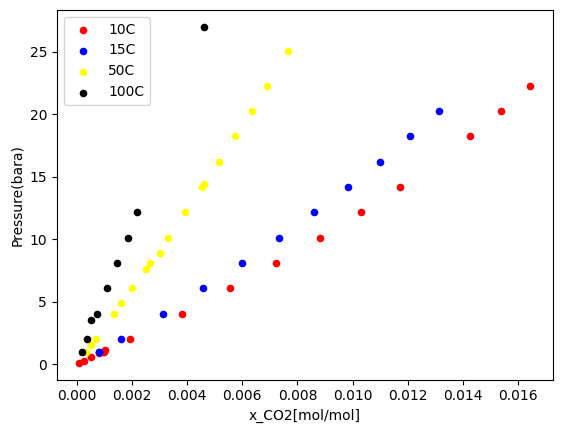

In [125]:
from matplotlib import pyplot as plt
fig = plt.figure()

data283 = expdata_df.loc[expdata_df['Temperature'] == 283.15]
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='red')

data288 = expdata_df.loc[expdata_df['Temperature'] == 288.15]
data288.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')

data323 = expdata_df.loc[expdata_df['Temperature'] == 323.15]
data323.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='yellow')

data373 = expdata_df.loc[expdata_df['Temperature'] == 373.15]
data373.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')			

plt.legend(['10C', '15C', '50C', '100C'])
plt.show()

# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

model  CPAs-SRK-EOS-statoil
mixing rule  classic-CPA_T
kij  -0.27686
kijT  0.001121


<Figure size 640x480 with 0 Axes>

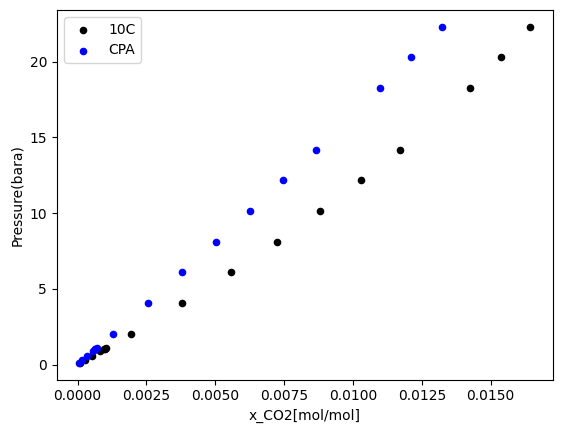

In [126]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

# Creating a fluid in neqsim
fluid1 = fluid('cpa') #create a fluid using the SRK-EoS
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

def solubility(pres):
    fluid1.setPressure(pres, 'bara')
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent('CO2').getx()

pressures = data283['Pressure'].values.tolist()
x_res = [solubility(P) for P in pressures]

dataWithExperiment = data283.assign(x_CPA = x_res)

print('model ', fluid1.getModelName())
print('mixing rule ', fluid1.getMixingRuleName())
print('kij ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1))
print('kijT ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1))

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')	
dataWithExperiment.plot(ax=plot1, x='x_CPA', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')	
plt.legend(['10C', 'CPA'])
plt.show()

In [128]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('CO2').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA = solres)

devdf = (dataWithExperiment['x_CPA'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp.csv')

median average deviation  10.31499590277296


/tmp/ipykernel_2032/691086241.py:35: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))


# Parameter fitting

## Manual fiting

In [133]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('CO2', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

print('inital parameters ')
print('kij ', fluid1.getPhase(0).getMixingRule().getBinaryInteractionParameter(0,1))
print('kijT ', fluid1.getPhase(0).getMixingRule().getBinaryInteractionParameterT1(0,1))

fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, 0.02)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('CO2').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA_fitted = solres)

devdf = (dataWithExperiment['x_CPA_fitted'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev_fitted = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp-fitted.csv')

inital parameters 
kij  -0.27686
kijT  0.001121
median average deviation  23.11350301175641


/tmp/ipykernel_2032/3061319888.py:38: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))


## Automatic fitting